<a href="https://colab.research.google.com/github/Disha2190/Image-Classification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.4 ms (started: 2021-02-20 11:20:36 +00:00)


In [ ]:
!pip install bing-image-downloader

time: 2.84 s (started: 2021-02-20 11:20:41 +00:00)


In [ ]:
!mkdir images

time: 116 ms (started: 2021-02-20 11:20:51 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("cat",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://scitechdaily.com/images/Cat-COVID-19-Mask.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.reportingday.com/wp-content/uploads/2018/06/Cat-Sleeping-Pics.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.cutenessoverflow.com/wp-content/uploads/2015/05/cat-tongue-out-50-929x1024.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://api.time.com/wp-content/uploads/2019/12/CatFilterReaction.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://peopledotcom.files.wordpress.com/2017/11/chimera-cat.jpg
[!] Issue getting: https://peopledotcom.files.wordpress.com/2017/11/chimera-cat.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #5 from https://upload.wikimedia.org/wikipedia/commons/d/dc/Grumpy_Cat_(14556024763)_(cropped).jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://upload.wikimedia.org/wikipedia/commons/

In [ ]:
downloader.download("dog",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Australian_Catle_Dog_Silverbarn's_Paavo.jpg/1200px-Australian_Catle_Dog_Silverbarn's_Paavo.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://peopledotcom.files.wordpress.com/2017/05/downward-dog-2.jpg
[!] Issue getting: https://peopledotcom.files.wordpress.com/2017/05/downward-dog-2.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #2 from https://sydneydruglawyers.com.au/wp-content/uploads/sniffer-dog-1024x1024.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://media.mercola.com/ImageServer/Public/2018/October/FB/dog-breeds-for-active-people-fb.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.sciencealert.com/images/articles/processed/dog-doubt_1024.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.bkcphoto.com/Portraits/wp-content/uploads/2014/03/Dog_Faces_06.

In [ ]:
downloader.download("rose flower",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://flowerinfo.org/wp-content/gallery/rose-flowers/rose-flower-14.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://4.bp.blogspot.com/-w4oTZjlpgwo/T5_pi-KJPuI/AAAAAAAAAoM/rKm3E0XCbgY/s1600/red_rose_flower3.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.flowers.org.uk/wp-content/uploads/2012/03/Rose.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://bayofislandscelebrant.files.wordpress.com/2013/07/rose-flower.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://3.bp.blogspot.com/-qmaX_kHeJEI/UZ4UVB_bk5I/AAAAAAAAO_A/OxD7nYT8dEQ/s1600/red-be-the-rose-flowers-garden-red-roses-vase75.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://4.bp.blogspot.com/-KQVi6334l54/T5_sUeEsiEI/AAAAAAAAAzA/eJr3ZkEa-4Q/s1600/Beautiful-Rose-Flowers-Pictures-And-Wallpapers62.j.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.flo

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['cat','dog','rose flower']

for category in CATEGORIES:
   class_num = CATEGORIES.index(category)
   path = os.path.join(DATADIR,category)
   for img in os.listdir(path):
     img_array = imread(os.path.join(path,img))
     img_resized = resize(img_array,(150,150,3))
     flat_data.append(img_resized.flatten()) 
     images.append(img_resized)
     target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
     

time: 1min 27s (started: 2021-02-20 11:22:37 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 268 ms (started: 2021-02-20 11:24:28 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 2min (started: 2021-02-20 11:24:41 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0,
       2, 0, 0, 0, 1])

time: 195 ms (started: 2021-02-20 11:26:47 +00:00)


In [ ]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 8 ms (started: 2021-02-20 11:26:55 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 815 µs (started: 2021-02-20 11:27:04 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.6296296296296297

time: 4.06 ms (started: 2021-02-20 11:27:13 +00:00)


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 50.6 ms (started: 2021-02-20 11:27:24 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 22.5 ms (started: 2021-02-20 11:27:37 +00:00)


Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQqOxHCcwPlBipUtl455vCh88FxuclJ1L-86w&usqp=CAU
(225, 225, 3)
 PREDICTED OUTPUT: rose flower


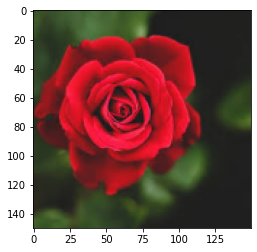

time: 43.6 s (started: 2021-02-20 11:27:48 +00:00)


In [ ]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')